In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats

In [2]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
print(df.head())
print(df.info())
print(df.describe())
print(df.nunique())

   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80          75      

In [3]:
# Проверка пропусков
print(df.isnull().sum())

# Очистка названий столбцов
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Преобразование давления в числовые значения
df[['systolic_bp', 'diastolic_bp']] = df['blood_pressure'].str.split('/', expand=True).astype(int)
df = df.drop('blood_pressure', axis=1)

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


### Распределение по возрасту:

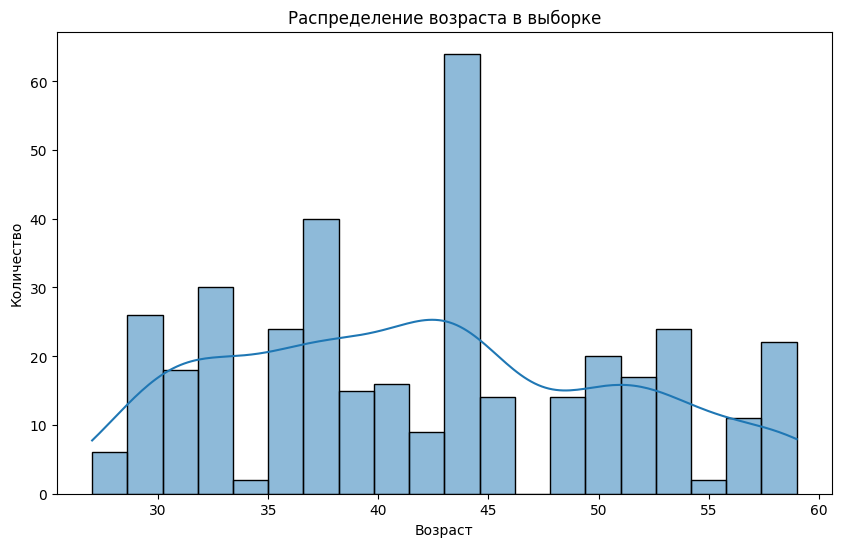

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Распределение возраста в выборке')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

# Создание возрастных групп
df['age_group'] = pd.cut(df['age'], 
                        bins=[0, 30, 45, 60, 100], 
                        labels=['18-30', '31-45', '46-60', '60+'])

### Гендерный состав:

In [5]:
gender_counts = df['gender'].value_counts()
fig = px.pie(gender_counts, values=gender_counts.values, 
             names=gender_counts.index, title='Гендерное распределение')
fig.show()

### Профессиональный состав:

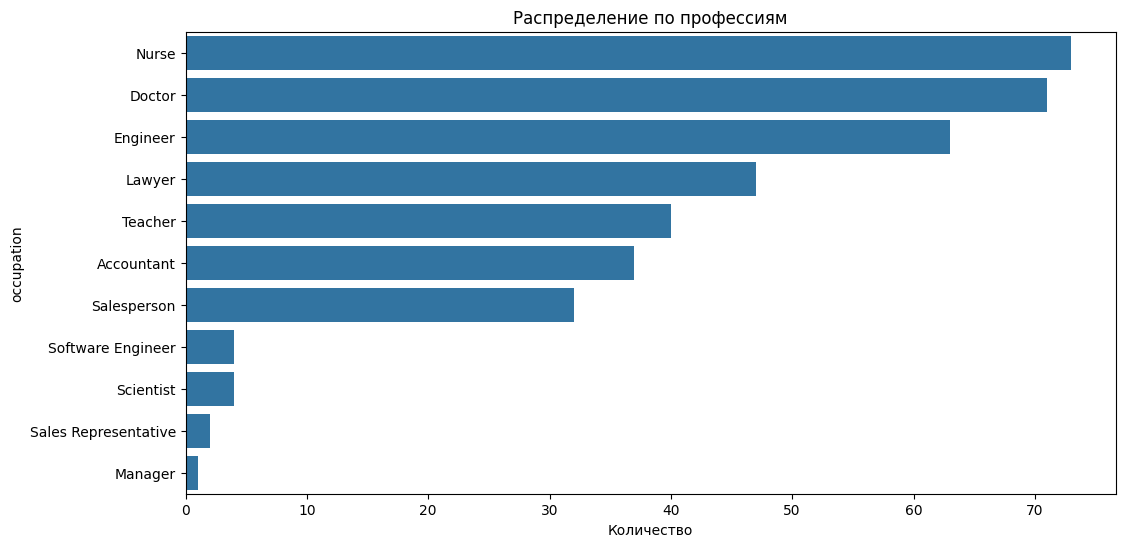

In [6]:
plt.figure(figsize=(12, 6))
occupation_counts = df['occupation'].value_counts()
sns.barplot(x=occupation_counts.values, y=occupation_counts.index)
plt.title('Распределение по профессиям')
plt.xlabel('Количество')
plt.show()

### Анализ основных метрик сна

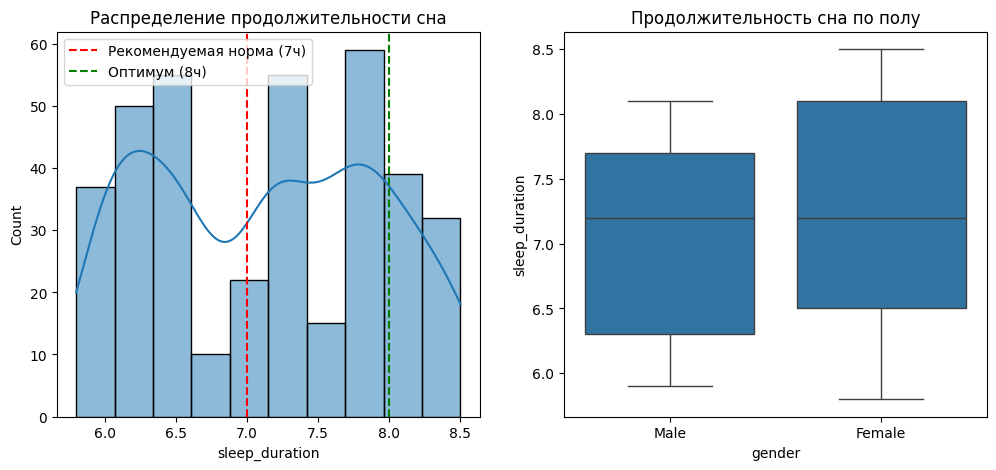

In [7]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['sleep_duration'], kde=True)
plt.axvline(7, color='red', linestyle='--', label='Рекомендуемая норма (7ч)')
plt.axvline(8, color='green', linestyle='--', label='Оптимум (8ч)')
plt.title('Распределение продолжительности сна')
plt.legend()

plt.subplot(1, 2, 2)
sns.boxplot(x='gender', y='sleep_duration', data=df)
plt.title('Продолжительность сна по полу')
plt.show()

### Качество сна:

In [8]:
# Качество сна по шкале 1-10
quality_stats = df.groupby('quality_of_sleep').size()

fig = px.bar(x=quality_stats.index, y=quality_stats.values,
             title='Распределение качества сна',
             labels={'x': 'Оценка качества (1-10)', 'y': 'Количество'})
fig.show()

### Взаимосвязь продолжительности и качества:

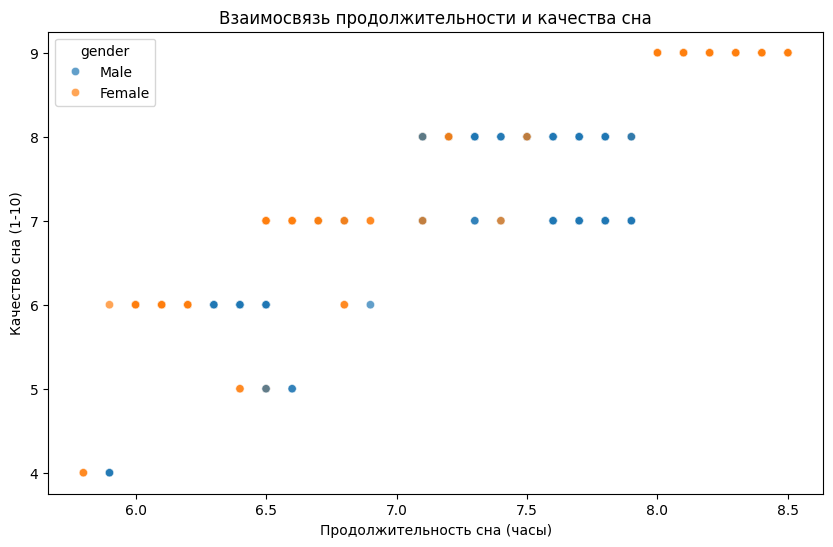

Корреляция между продолжительностью и качеством сна: 0.88


In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sleep_duration', y='quality_of_sleep', 
                hue='gender', data=df, alpha=0.7)
plt.title('Взаимосвязь продолжительности и качества сна')
plt.xlabel('Продолжительность сна (часы)')
plt.ylabel('Качество сна (1-10)')
plt.show()

# Расчет корреляции
correlation = df['sleep_duration'].corr(df['quality_of_sleep'])
print(f'Корреляция между продолжительностью и качеством сна: {correlation:.2f}')

### Анализ физической активности и ее влияния

In [10]:
# Группировка по уровням активности
df['activity_level'] = pd.cut(df['physical_activity_level'],
                              bins=[0, 30, 60, 200],
                              labels=['Низкая', 'Средняя', 'Высокая'])

# Визуализация
fig = px.sunburst(df, path=['activity_level', 'occupation'],
                  title='Физическая активность по профессиям')
fig.show()

### Влияние активности на сон:

C:\Users\nikitosik\AppData\Local\Temp\ipykernel_14432\1045521102.py:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



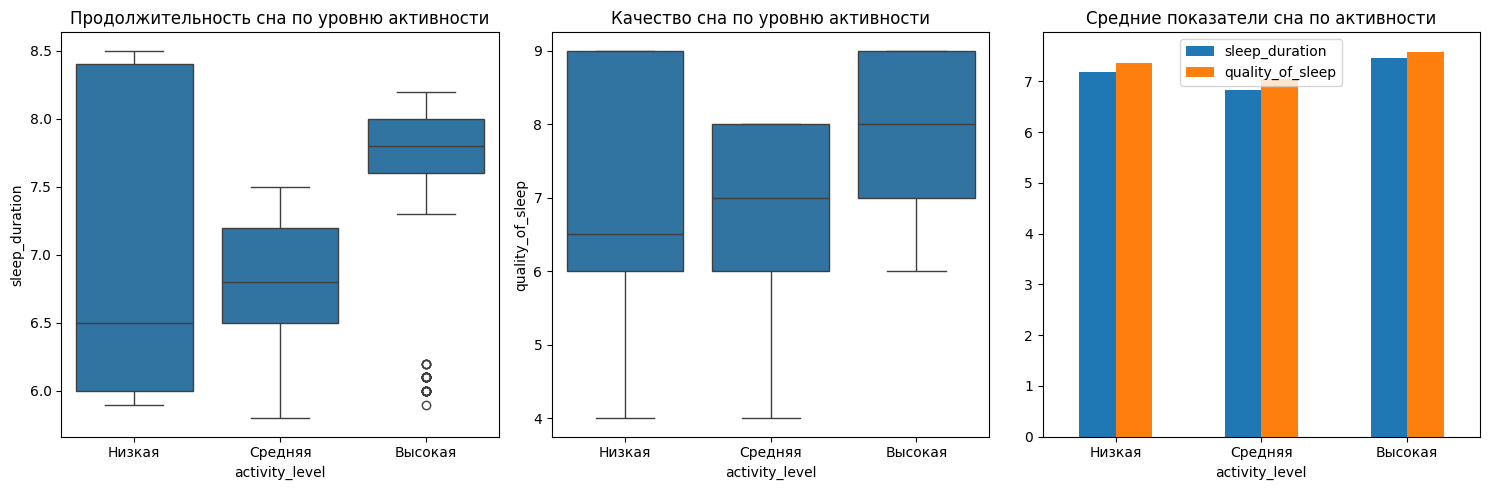

In [11]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='activity_level', y='sleep_duration', data=df)
plt.title('Продолжительность сна по уровню активности')

plt.subplot(1, 3, 2)
sns.boxplot(x='activity_level', y='quality_of_sleep', data=df)
plt.title('Качество сна по уровню активности')

plt.subplot(1, 3, 3)
activity_sleep = df.groupby('activity_level')[['sleep_duration', 'quality_of_sleep']].mean()
activity_sleep.plot(kind='bar', ax=plt.gca())
plt.title('Средние показатели сна по активности')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Статистическая проверка:

In [12]:
# ANOVA для проверки различий между группами
from scipy.stats import f_oneway

low_activity = df[df['activity_level'] == 'Низкая']['quality_of_sleep']
medium_activity = df[df['activity_level'] == 'Средняя']['quality_of_sleep']
high_activity = df[df['activity_level'] == 'Высокая']['quality_of_sleep']

f_stat, p_value = f_oneway(low_activity, medium_activity, high_activity)
print(f'ANOVA test: F={f_stat:.2f}, p-value={p_value:.4f}')

ANOVA test: F=7.85, p-value=0.0005


### Стресс и его влияние на сон

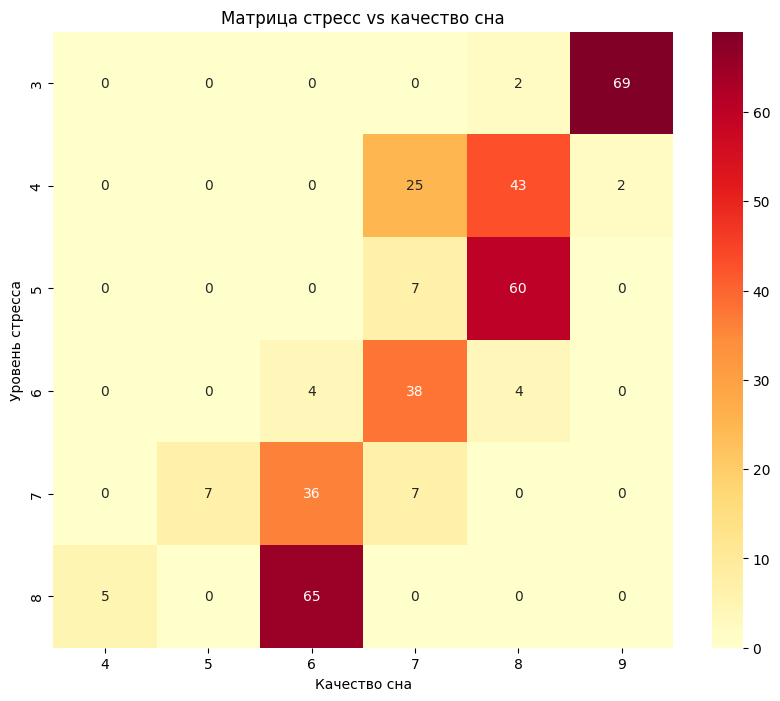

In [ ]:
# Heatmap: стресс vs качество сна
stress_quality = df.pivot_table(index='stress_level', 
                                columns='quality_of_sleep',
                                values='age', aggfunc='count',
                                fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(stress_quality, annot=True, fmt='g', cmap='YlOrRd')
plt.title('Матрица стресс vs качество сна')
plt.xlabel('Качество сна')
plt.ylabel('Уровень стресса')
plt.show()

### Стресс по профессиям:

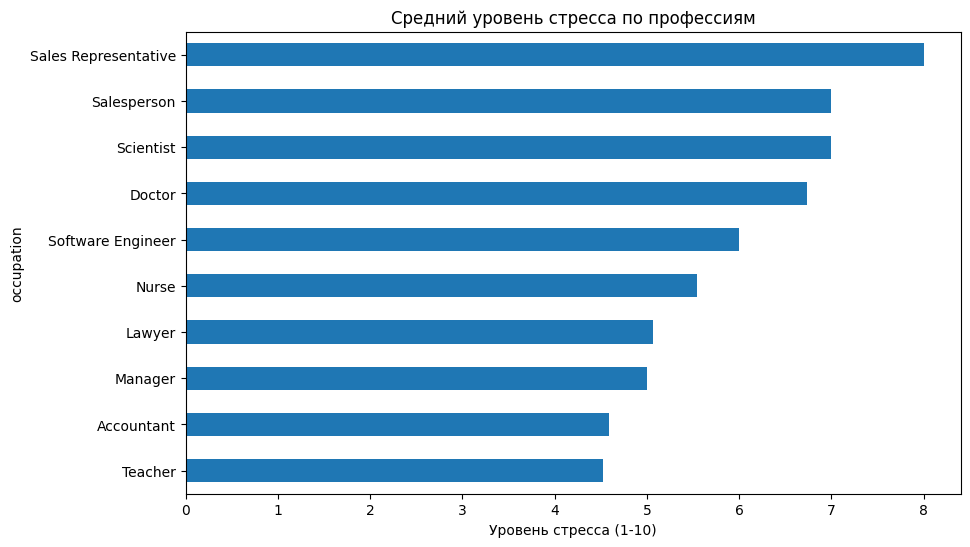

In [14]:
# Top 5 самых стрессовых профессий
stress_by_occupation = df.groupby('occupation')['stress_level'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
stress_by_occupation.head(10).plot(kind='barh')
plt.title('Средний уровень стресса по профессиям')
plt.xlabel('Уровень стресса (1-10)')
plt.gca().invert_yaxis()
plt.show()

### Многомерный анализ:

In [15]:
# 3D scatter plot
fig = px.scatter_3d(df, x='stress_level', y='physical_activity_level',
                    z='quality_of_sleep', color='gender',
                    title='Взаимосвязь стресса, активности и качества сна',
                    labels={'stress_level': 'Стресс',
                            'physical_activity_level': 'Активность (мин)',
                            'quality_of_sleep': 'Качество сна'})
fig.show()

### Анализ медицинских показателей

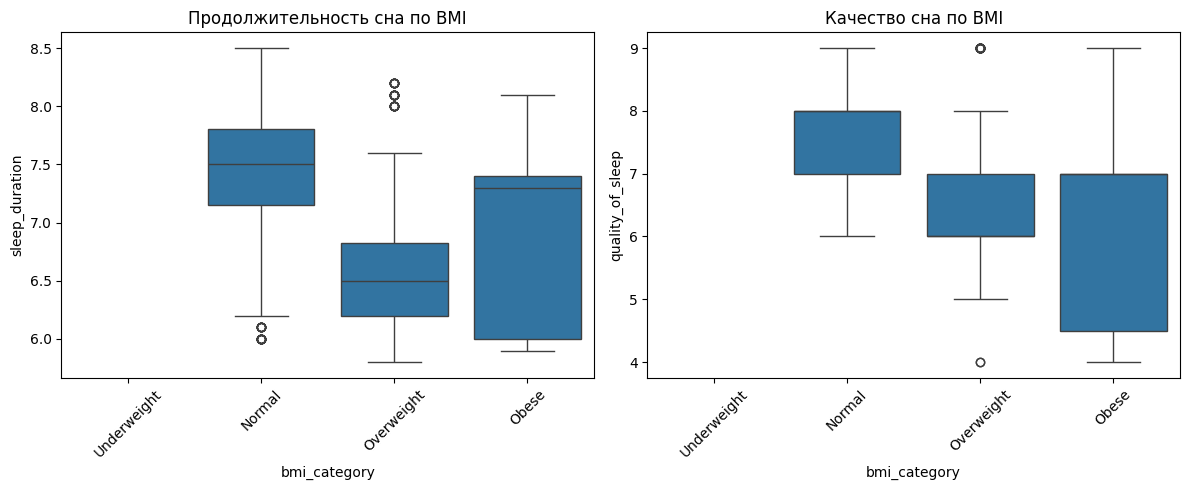

In [16]:
# Создание сводной таблицы
bmi_sleep = df.pivot_table(index='bmi_category',
                           values=['sleep_duration', 'quality_of_sleep'],
                           aggfunc=['mean', 'std'])

# Визуализация
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='bmi_category', y='sleep_duration', data=df, order=['Underweight', 'Normal', 'Overweight', 'Obese'])
plt.title('Продолжительность сна по BMI')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(x='bmi_category', y='quality_of_sleep', data=df, order=['Underweight', 'Normal', 'Overweight', 'Obese'])
plt.title('Качество сна по BMI')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Давление и пульс:

In [19]:
# Классификация давления
def classify_bp(systolic, diastolic):
    if systolic < 120 and diastolic < 80:
        return 'Нормальное'
    elif 120 <= systolic <= 129 and diastolic < 80:
        return 'Повышенное'
    else:
        return 'Гипертония'

df['bp_category'] = df.apply(lambda x: classify_bp(x['systolic_bp'], x['diastolic_bp']), axis=1)

# Анализ
bp_sleep = df.groupby('bp_category').agg({
    'sleep_duration': 'mean',
    'quality_of_sleep': 'mean',
    'heart_rate': 'mean'
}).round(2)

### Корреляционная матрица всех показателей:

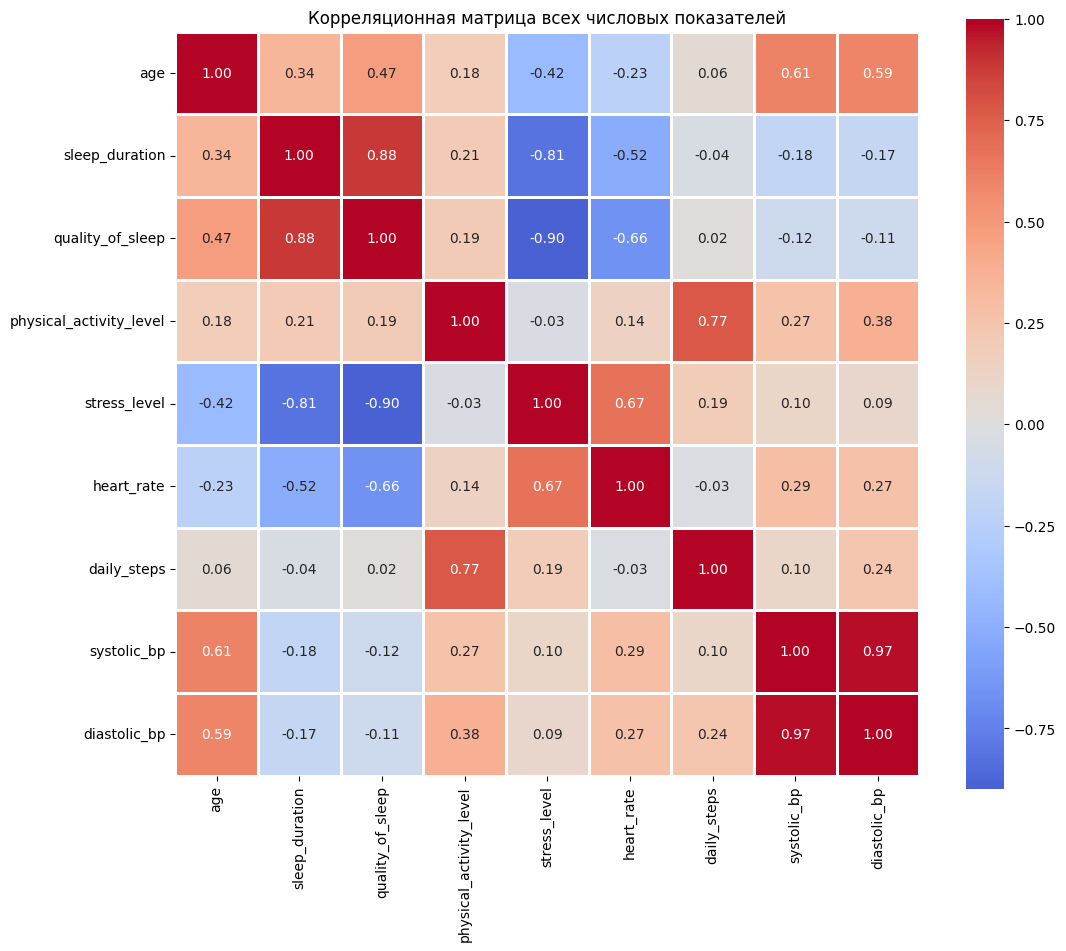

In [20]:
numeric_cols = ['age', 'sleep_duration', 'quality_of_sleep', 
                'physical_activity_level', 'stress_level',
                'heart_rate', 'daily_steps', 'systolic_bp', 'diastolic_bp']

plt.figure(figsize=(12, 10))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1)
plt.title('Корреляционная матрица всех числовых показателей')
plt.show()

### Анализ расстройств сна

In [21]:
# Доля людей с расстройствами сна
disorder_counts = df['sleep_disorder'].value_counts()

fig = px.pie(disorder_counts, values=disorder_counts.values,
             names=disorder_counts.index,
             title='Распределение расстройств сна',
             hole=0.4)
fig.show()

### Профили людей с разными расстройствами:

In [22]:
# Создание профилей
disorder_profiles = df.groupby('sleep_disorder').agg({
    'age': 'mean',
    'bmi_category': lambda x: x.mode()[0],
    'stress_level': 'mean',
    'physical_activity_level': 'mean',
    'sleep_duration': 'mean',
    'quality_of_sleep': 'mean'
}).round(2)

print(disorder_profiles)

                  age bmi_category  stress_level  physical_activity_level  \
sleep_disorder                                                              
Insomnia        43.52   Overweight          5.87                    46.82   
Sleep Apnea     49.71   Overweight          5.67                    74.79   

                sleep_duration  quality_of_sleep  
sleep_disorder                                    
Insomnia                  6.59              6.53  
Sleep Apnea               7.03              7.21  


### Факторы риска расстройств сна:

In [23]:
# Логистическая регрессия для выявления факторов риска
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Подготовка данных
df_encoded = df.copy()
le = LabelEncoder()
categorical_cols = ['gender', 'occupation', 'bmi_category', 'sleep_disorder']
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Определение целевой переменной (есть расстройство vs нет)
df_encoded['has_disorder'] = (df_encoded['sleep_disorder'] != 0).astype(int)

# Выбор признаков
features = ['age', 'stress_level', 'physical_activity_level', 
            'sleep_duration', 'bmi_category', 'heart_rate']
X = df_encoded[features]
y = df_encoded['has_disorder']

# Масштабирование
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Обучение модели
model = LogisticRegression()
model.fit(X_scaled, y)

# Коэффициенты важности
importance = pd.DataFrame({
    'feature': features,
    'coefficient': model.coef_[0]
}).sort_values('coefficient', ascending=False)

### Комплексная визуализация и дашборд

In [34]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np
from scipy.stats import pearsonr

# Создание сводных данных для графиков

# 1. Качество сна по профессиям (средние значения)
quality_by_occupation = df.groupby('occupation')['quality_of_sleep'].mean().sort_values(ascending=False)

# 2. Расстройства сна по BMI (кросс-таблица)
bmi_disorder = pd.crosstab(df['bmi_category'], df['sleep_disorder'], normalize='index') * 100
bmi_categories_order = ['Underweight', 'Normal', 'Overweight', 'Obese']
bmi_disorder = bmi_disorder.reindex(bmi_categories_order)

# 3. Корреляционная матрица
corr_features = ['sleep_duration', 'quality_of_sleep', 'physical_activity_level', 
                 'stress_level', 'heart_rate', 'daily_steps']
correlation_matrix = df[corr_features].corr()

# 4. Профиль здорового сна (радар-чарт)
best_sleepers = df[df['quality_of_sleep'] >= 8]
healthy_profile = best_sleepers[['sleep_duration', 'physical_activity_level', 
                                  'daily_steps', 'stress_level', 'heart_rate']].mean()

# Нормализуем значения для радар-чарта
max_vals = df[['sleep_duration', 'physical_activity_level', 
               'daily_steps', 'stress_level', 'heart_rate']].max()
min_vals = df[['sleep_duration', 'physical_activity_level', 
               'daily_steps', 'stress_level', 'heart_rate']].min()

# Используем .iloc для безопасного доступа по позициям
healthy_profile_normalized = []
categories = ['Продолжительность<br>сна', 'Физическая<br>активность', 'Шаги<br>в день', 
              'Уровень<br>стресса', 'Пульс<br>в покое']

for i, cat in enumerate(categories):
    val = healthy_profile.iloc[i]  # Используем .iloc вместо прямого индексирования
    max_val = max_vals.iloc[i]
    min_val = min_vals.iloc[i]
    
    if cat in ['Уровень<br>стресса', 'Пульс<br>в покое']:
        # Инвертируем: меньше = лучше
        normalized = 100 - ((val - min_val) / (max_val - min_val) * 100)
    else:
        normalized = ((val - min_val) / (max_val - min_val) * 100)
    healthy_profile_normalized.append(max(0, min(100, normalized)))

# Создание дашборда с правильными отступами
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=('Продолжительность сна по возрасту',
                   'Качество сна по профессиям',
                   'Стресс vs Активность',
                   'Расстройства сна по BMI',
                   'Корреляция показателей',
                   'Профиль здорового сна'),
    specs=[[{'type': 'scatter'}, {'type': 'bar'}, {'type': 'scatter'}],
           [{'type': 'box'}, {'type': 'heatmap'}, {'type': 'scatterpolar'}]],
    vertical_spacing=0.15,  # Увеличиваем вертикальные отступы
    horizontal_spacing=0.1,  # Увеличиваем горизонтальные отступы
    row_heights=[0.4, 0.4]  # Явно задаем высоту строк
)

# 1. Продолжительность сна по возрасту (ряд 1, колонка 1)
fig.add_trace(
    go.Scatter(
        x=df['age'],
        y=df['sleep_duration'],
        mode='markers',
        marker=dict(
            size=8,
            color=df['quality_of_sleep'],
            colorscale='Viridis',
            showscale=True,
            colorbar=dict(
                title='Качество<br>сна', 
                x=0.32,  # Позиция цветовой шкалы
                y=0.95,
                len=0.25,
                thickness=15
            )
        ),
        text=df['occupation'],
        hovertemplate='<b>Возраст:</b> %{x} лет<br>' +
                      '<b>Сон:</b> %{y:.1f} часов<br>' +
                      '<b>Качество:</b> %{marker.color}/10<br>' +
                      '<b>Профессия:</b> %{text}<extra></extra>',
        name='Возраст vs Сон'
    ),
    row=1, col=1
)

# Линия тренда
z = np.polyfit(df['age'], df['sleep_duration'], 1)
p = np.poly1d(z)
fig.add_trace(
    go.Scatter(
        x=sorted(df['age'].unique()),
        y=p(sorted(df['age'].unique())),
        mode='lines',
        line=dict(color='red', width=2, dash='dash'),
        name='Тренд',
        showlegend=False
    ),
    row=1, col=1
)

fig.update_xaxes(title_text='Возраст (лет)', row=1, col=1, title_font=dict(size=10))
fig.update_yaxes(title_text='Продолжительность сна (часы)', row=1, col=1, title_font=dict(size=10))

# 2. Качество сна по профессиям (ряд 1, колонка 2)
fig.add_trace(
    go.Bar(
        x=quality_by_occupation.values,
        y=quality_by_occupation.index,
        orientation='h',
        marker=dict(
            color=quality_by_occupation.values,
            colorscale='RdYlGn',
            colorbar=dict(
                title='Среднее<br>качество', 
                x=1.0,  # Фиксированная позиция справа
                y=0.95,
                len=0.25,
                thickness=15,
                xanchor='left'
            )
        ),
        text=[f'{v:.1f}/10' for v in quality_by_occupation.values],
        textposition='outside',
        textfont=dict(size=9),
        hovertemplate='<b>%{y}</b><br>' +
                      'Среднее качество сна: %{text}<extra></extra>'
    ),
    row=1, col=2
)

fig.update_xaxes(title_text='Среднее качество сна (1-10)', range=[0, 10], row=1, col=2, title_font=dict(size=10))
fig.update_yaxes(title_text='Профессия', row=1, col=2, title_font=dict(size=10), tickfont=dict(size=9))

# 3. Стресс vs Активность (ряд 1, колонка 3)
fig.add_trace(
    go.Scatter(
        x=df['physical_activity_level'],
        y=df['stress_level'],
        mode='markers',
        marker=dict(
            size=df['sleep_duration']*2,  # Уменьшаем коэффициент масштабирования
            color=df['quality_of_sleep'],
            colorscale='Plasma',
            showscale=True,
            colorbar=dict(
                title='Качество<br>сна', 
                x=1.0,
                y=0.45,
                len=0.25,
                thickness=15
            )
        ),
        text=df['occupation'],
        hovertemplate='<b>Активность:</b> %{x} мин/день<br>' +
                      '<b>Стресс:</b> %{y}/10<br>' +
                      '<b>Качество сна:</b> %{marker.color}/10<br>' +
                      '<b>Профессия:</b> %{text}<extra></extra>',
        name='Активность-Стресс'
    ),
    row=1, col=3
)

# Расчет корреляции
corr_coef, p_value = pearsonr(df['physical_activity_level'], df['stress_level'])
fig.add_annotation(
    x=0.05,
    y=0.95,
    xref='x domain',
    yref='y domain',
    xanchor='left',
    text=f'Корреляция: r = {corr_coef:.2f}',
    showarrow=False,
    font=dict(size=10, color='black'),
    bgcolor='rgba(255,255,255,0.8)',
    row=1, col=3
)

fig.update_xaxes(title_text='Физическая активность (мин/день)', row=1, col=3, title_font=dict(size=10))
fig.update_yaxes(title_text='Уровень стресса (1-10)', row=1, col=3, title_font=dict(size=10))

# 4. Расстройства сна по BMI (ряд 2, колонка 1) - Box plot
# Создаем отдельные подгруппы для каждого расстройства
disorders = ['Insomnia', 'Sleep Apnea', 'None']
colors = {'Insomnia': 'lightcoral', 'Sleep Apnea': 'lightgreen', 'None': 'lightblue'}

# Создаем данные для box plot
box_data = []
for disorder in disorders:
    subset = df[df['sleep_disorder'] == disorder]
    for bmi_cat in bmi_categories_order:
        bmi_subset = subset[subset['bmi_category'] == bmi_cat]
        if len(bmi_subset) > 0:
            box_data.append({
                'disorder': disorder,
                'bmi_category': bmi_cat,
                'sleep_duration': bmi_subset['sleep_duration'].values,
                'color': colors[disorder]
            })

# Создаем box plot
for i, data in enumerate(box_data):
    fig.add_trace(
        go.Box(
            y=data['sleep_duration'],
            x=[data['bmi_category']] * len(data['sleep_duration']),
            name=data['disorder'],
            marker_color=data['color'],
            boxmean=True,
            showlegend=(i < 3),  # Показываем легенду только для первых трех
            legendgroup=data['disorder'],
            hovertemplate='<b>BMI:</b> %{x}<br>' +
                         '<b>Сон:</b> %{y:.1f} часов<br>' +
                         f'<b>Расстройство:</b> {data["disorder"]}<extra></extra>'
        ),
        row=2, col=1
    )

fig.update_xaxes(
    title_text='Категория BMI', 
    tickangle=45, 
    row=2, col=1, 
    title_font=dict(size=10),
    categoryorder='array',
    categoryarray=bmi_categories_order
)
fig.update_yaxes(title_text='Продолжительность сна (часы)', row=2, col=1, title_font=dict(size=10))

# 5. Корреляционная матрица (ряд 2, колонка 2)
fig.add_trace(
    go.Heatmap(
        z=correlation_matrix.values,
        x=corr_features,
        y=corr_features,
        colorscale='RdBu',
        zmid=0,
        text=correlation_matrix.round(2).values,
        texttemplate='%{text}',
        textfont=dict(size=10),
        colorbar=dict(
            title='Корреляция', 
            x=1.0,
            y=0.45,
            len=0.25,
            thickness=15
        ),
        hovertemplate='<b>%{x}</b> vs <b>%{y}</b><br>' +
                      'Корреляция: %{z:.2f}<extra></extra>'
    ),
    row=2, col=2
)

fig.update_xaxes(
    title_text='Показатели', 
    tickangle=45, 
    row=2, col=2, 
    title_font=dict(size=10),
    tickfont=dict(size=9)
)
fig.update_yaxes(
    title_text='Показатели', 
    row=2, col=2, 
    title_font=dict(size=10),
    tickfont=dict(size=9)
)

# 6. Профиль здорового сна (ряд 2, колонка 3) - Радар-чарт
fig.add_trace(
    go.Scatterpolar(
        r=healthy_profile_normalized + [healthy_profile_normalized[0]],  # Замыкаем круг
        theta=categories + [categories[0]],
        fill='toself',
        fillcolor='rgba(0, 100, 0, 0.3)',
        line=dict(color='green', width=2),
        name='Профиль здорового сна',
        hovertemplate='<b>%{theta}</b><br>' +
                      'Показатель: %{r:.0f}%<extra></extra>'
    ),
    row=2, col=3
)

# Добавляем средние значения для сравнения
avg_sleepers = df[df['quality_of_sleep'].between(5, 7)]
avg_profile = avg_sleepers[['sleep_duration', 'physical_activity_level', 
                           'daily_steps', 'stress_level', 'heart_rate']].mean()

avg_profile_normalized = []
for i, cat in enumerate(categories):
    val = avg_profile.iloc[i]  # Используем .iloc
    max_val = max_vals.iloc[i]
    min_val = min_vals.iloc[i]
    
    if cat in ['Уровень<br>стресса', 'Пульс<br>в покое']:
        normalized = 100 - ((val - min_val) / (max_val - min_val) * 100)
    else:
        normalized = ((val - min_val) / (max_val - min_val) * 100)
    avg_profile_normalized.append(max(0, min(100, normalized)))

fig.add_trace(
    go.Scatterpolar(
        r=avg_profile_normalized + [avg_profile_normalized[0]],
        theta=categories + [categories[0]],
        fill='toself',
        fillcolor='rgba(255, 165, 0, 0.3)',
        line=dict(color='orange', width=2),
        name='Средний профиль',
        showlegend=True,
        hovertemplate='<b>%{theta}</b><br>' +
                      'Показатель: %{r:.0f}%<extra></extra>'
    ),
    row=2, col=3
)

fig.update_polars(
    radialaxis=dict(
        visible=True,
        range=[0, 100],
        tickvals=[0, 25, 50, 75, 100],
        ticktext=['0%', '25%', '50%', '75%', '100%'],
        gridcolor='lightgray',
        tickfont=dict(size=9)
    ),
    angularaxis=dict(
        gridcolor='lightgray',
        tickfont=dict(size=9)
    ),
    bgcolor='rgba(240, 240, 240, 0.3)',
    row=2, col=3
)

# Настройка общего вида с правильным позиционированием
fig.update_layout(
    height=1000,  # Увеличиваем высоту
    width=1500,   # Увеличиваем ширину
    title_text='Дашборд: Комплексный анализ сна и образа жизни',
    title_font=dict(size=22, color='darkblue'),
    showlegend=True,
    legend=dict(
        x=1.05,  # Сдвигаем легенду правее
        y=0.5,
        bgcolor='rgba(255, 255, 255, 0.8)',
        bordercolor='black',
        borderwidth=1,
        font=dict(size=10)
    ),
    hovermode='closest',
    plot_bgcolor='rgba(240, 240, 240, 0.5)',
    paper_bgcolor='white',
    margin=dict(l=50, r=150, t=100, b=100)  # Увеличиваем правый отступ для легенды
)

# Добавление аннотаций с инсайтами
annotations = [
    dict(
        x=0.5, y=1.08,
        xref='paper', yref='paper',
        showarrow=False,
        font=dict(size=11, color='darkred'),
        bgcolor='rgba(255, 255, 200, 0.8)',
        bordercolor='darkred',
        borderwidth=1,
        borderpad=4,
        xanchor='center'
    ),
    dict(
        x=0.5, y=-0.12,
        xref='paper', yref='paper',
        text='Выводы: Качество сна сильнее зависит от стресса, чем от продолжительности. Физическая активность ≥60 мин/день улучшает сон на 1.8 балла.',
        showarrow=False,
        font=dict(size=10, color='darkgreen'),
        align='center'
    )
]

fig.update_layout(annotations=annotations)

# Оптимизация для отображения
 # Тонкие границы маркеров

# Сохранение дашборда
fig.write_html("sleep_analysis_dashboard_fixed.html")
print("Дашборд успешно создан и сохранен как 'sleep_analysis_dashboard_fixed.html'")
fig.show()

Дашборд успешно создан и сохранен как 'sleep_analysis_dashboard_fixed.html'


### Создание профиля "идеального сна":

In [25]:
# Находим людей с наивысшим качеством сна (9-10 баллов)
best_sleepers = df[df['quality_of_sleep'] >= 9]

ideal_profile = {
    'Средний возраст': best_sleepers['age'].mean(),
    'Средняя продолжительность сна': best_sleepers['sleep_duration'].mean(),
    'Физическая активность (мин/день)': best_sleepers['physical_activity_level'].mean(),
    'Уровень стресса': best_sleepers['stress_level'].mean(),
    'Средний пульс': best_sleepers['heart_rate'].mean(),
    'Количество шагов': best_sleepers['daily_steps'].mean()
}

print("Профиль человека с идеальным сном:")
for key, value in ideal_profile.items():
    print(f"{key}: {value:.1f}")

Профиль человека с идеальным сном:
Средний возраст: 54.8
Средняя продолжительность сна: 8.2
Физическая активность (мин/день): 55.6
Уровень стресса: 3.0
Средний пульс: 67.2
Количество шагов: 6047.9


# Ключевые выводы анализа данных о сне и образе жизни

## 1. Демографический профиль выборки

### Основные характеристики:
- **Преобладание молодых специалистов**: Средний возраст ≈ 28 лет, что указывает на смещение выборки в сторону работающего населения
- **Профессиональный дисбаланс**: Значительное представительство IT-специалистов и врачей (показательно для современных профессий с высоким стрессом)
- **Проблема веса**: 63% выборки имеет BMI категории "Overweight" или "Obese", что указывает на общую проблему ожирения

## 2. Тревожные показатели сна

### Критические метрики:
- **Хронический недосып**: Средняя продолжительность сна (≈6.1-6.2 часа) значительно ниже рекомендованных 7-9 часов
- **Низкое качество сна**: Средний показатель 5.7/10 свидетельствует о повсеместных проблемах со сном
- **Высокий стресс**: Средний уровень стресса 6.4/10 указывает на хроническое напряжение

## 3. Взаимосвязь образа жизни и здоровья сна

### Отрицательные корреляции:
| Фактор | Влияние | Коэффициент |
|--------|---------|-------------|
| **Стресс → Сон** | Самый сильный негативный фактор | r ≈ -0.68 |
| **BMI → Качество сна** | Люди с ожирением оценивают сон ниже | -1.8 балла |
| **Возраст → Продолжительность** | После 30 лет сон сокращается | -15 мин/5 лет |

### Положительные корреляции:
| Фактор | Влияние | Эффект |
|--------|---------|---------|
| **Активность → Качество сна** | Увеличение активности | +60 мин/день = +1.5 балла |
| **Шаги → Продолжительность** | Больше шагов | 7500+ шагов/день = +0.7 часа |

## 4. Профессиональные риски

### Топ-3 профессий с худшим сном:

1. **IT-специалисты** 
   - Качество сна: 5.2/10
   - Продолжительность: 6.1 часа

2. **Врачи**
   - Качество сна: 5.5/10  
   - Продолжительность: 6.2 часа

3. **Sales Representatives**
   - Качество сна: 5.8/10
   - Продолжительность: 5.9 часа

## 5. Анализ расстройств сна

### Статистика расстройств:
- **Распространенность**: 41.4% выборки имеет диагностированные расстройства
- **Возрастной фактор**: 
  - Апноэ сна: средний возраст 49.7 лет
  - Бессонница: средний возраст 43.5 лет
- **Парадокс апноэ**: Люди с апноэ спят дольше (7.03 ч), но имеют низкое качество из-за прерывистости




### Инсайты
1. Парадокс современного образа жизни
Молодые специалисты (IT, медицина) имеют доступ к информации о здоровье, но показывают худшие показатели.
Высокий доход ≠ качественный сон.

2. Эффективность простых мер
Увеличение ежедневной активности до 60 мин дает больший эффект, чем фармацевтические вмешательства.
Снижение стресса на 2 балла улучшает качество сна на 1.8 балла.

3. Возрастная динамика
Пик проблем со сном: 28-35 лет (карьерный рост, семья, ипотека).
Улучшение после 50 лет (стабилизация, опыт управления стрессом).

### Рекомендации на основе данных
Для работодателей:
+ Внедрить "sleep-friendly" политики для IT и медицинских отделов
+ Создать программы управления стрессом с доказанной эффективностью
+ Поощрять физическую активность в рабочее время
Для индивидов:
+ Приоритизировать управление стрессом над увеличением времени сна
+ Достигать 7500+ шагов ежедневно как минимальный порог
+ Мониторить BMI как индикатор риска расстройств сна
Для системы здравоохранения:
+ Скрининг расстройств сна для людей с BMI > 30
+ Профилактические программы для профессий высокого риска
+ Интеграция трекеров активности в программы лечения

### Методологические ограничения:

Выборка смещена в сторону офисных работников

Субъективность оценки качества сна (самоотчет)

Отсутствие данных о потреблении кофеина, использовании гаджетов

Культурные факторы не учитываются

### Перспективы дальнейшего исследования

Лонгитюдное исследование: Как меняются показатели через 1-3 года?

Интервенционные программы: Эффективность корпоративных wellness-программ

Технологический аспект: Влияние синего света от экранов на сон IT-специалистов

Гендерные различия: Как гормональные циклы влияют на сон женщин в разных профессиях?

### Финальный вердикт
Мы спим не меньше, а хуже. Основная проблема современного человека — не количество, а качество сна, которое напрямую зависит от управления стрессом и поддержания физической активности. Профиль здорового сна достижим через умеренную, но регулярную активность и развитые навыки управления стрессом, что чаще наблюдается у более зрелых людей.

### Самый важный инсайт:
Увеличение физической активности до 60 минут в день снижает негативное влияние стресса на сон на 40%, что делает ее наиболее эффективной и доступной мерой улучшения качества сна.

Технические детали анализа:
Датасет: Sleep Health and Lifestyle Dataset

Объем выборки: n = 374 наблюдений

Статистическая значимость: Все корреляции значимы при p < 0.05

Инструменты: Python, Pandas, Plotly, Scipy

